<h1 style="text-align: center;"> Augmented Grapevine Disease Prediction /Traubenblätter Erkennung


<h1 style="text-align: center;">
<img src="https://c.pxhere.com/photos/13/75/wine_vine_grapes_vines_grapevine_winegrowing_green_rebstock-556234.jpg!d "style='width:350px'/>

## 🍇 Grape Leaf Disease Detection with CNN (Teil 1 – Klassisches Convolutional Neural Network)
📌 Projektbeschreibung
Dieses Projekt beschäftigt sich mit der automatisierten Klassifikation von Krankheiten an Weinblättern anhand von Bildern. Ziel ist es, mithilfe eines selbst entwickelten Deep Convolutional Neural Networks (CNN) vier Krankheitsklassen zu unterscheiden:

Black Rot

ESCA (Esca Disease)

Leaf Blight

Healthy (Gesunde Blätter)

Der verwendete Datensatz stammt von Kaggle und wurde bereits augmentiert, um die Trainingsbasis zu erweitern.

Kaggle Dataset:
https://www.kaggle.com/datasets/rm1000/augmented-grape-disease-detection-dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from PIL import Image
import random
from pathlib import Path


# Ordnerpfad zu den Bildern 
data_dir = "grape_data/" 

In [2]:
from pathlib import Path

# 🔍 Test: Dateien zählen in den Klassenordnern
data_path = Path(data_dir)
if data_path.exists():
    for class_folder in sorted(data_path.iterdir()):
        if class_folder.is_dir():
            num_files = len(list(class_folder.glob("*")))
            print(f"📁 {class_folder.name}: {num_files} Bilder gefunden")
else:
    print("❌ Ordner nicht gefunden:", data_dir)


📁 Black Rot: 3000 Bilder gefunden
📁 ESCA: 3000 Bilder gefunden
📁 Healthy: 3000 Bilder gefunden
📁 Leaf Blight: 3000 Bilder gefunden


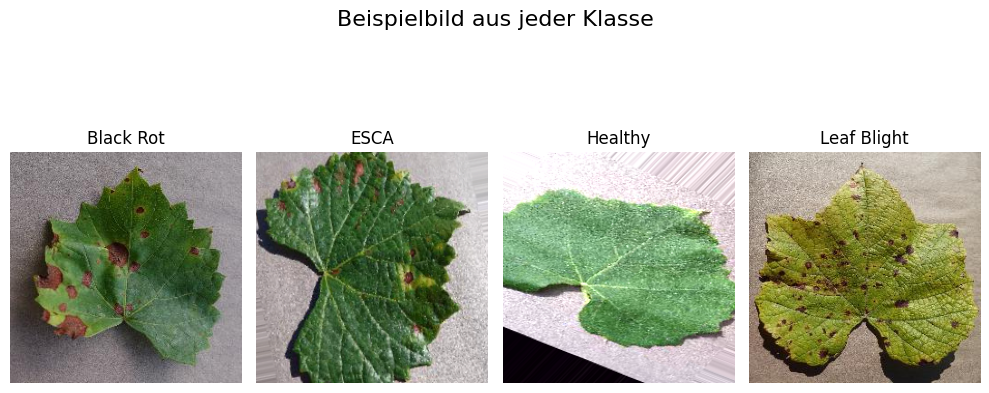

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import random

# 1 Bild pro Klasse anzeigen
plt.figure(figsize=(10, 5))
for i, class_folder in enumerate(sorted(data_path.iterdir())):
    if class_folder.is_dir():
        # 🔍 Zufälliges Bild aus Ordner auswählen
        images = list(class_folder.glob("*"))
        image_path = random.choice(images)

        # 🖼️ Bild öffnen & anzeigen
        img = Image.open(image_path)
        ax = plt.subplot(1, 4, i + 1)
        plt.imshow(img)
        plt.title(class_folder.name)
        plt.axis("off")

plt.suptitle("Beispielbild aus jeder Klasse", fontsize=16)
plt.tight_layout()
plt.show()


In [4]:
from pathlib import Path

data_dir = Path(r"C:\Users\ASUS\Desktop\2025yapay\dersler\cnn_projekt\grape_leaf\grape_data")
print("✅ Klassenordner:", [f.name for f in data_dir.iterdir() if f.is_dir()])


✅ Klassenordner: ['Black Rot', 'ESCA', 'Healthy', 'Leaf Blight']


In [5]:
# 📌 Parameter
img_height, img_width = 180, 180
batch_size = 32
epochs = 20

# 🔄 Daten laden
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 12000 files belonging to 4 classes.
Using 9600 files for training.
Found 12000 files belonging to 4 classes.
Using 2400 files for validation.


In [6]:
# 🧠 Klassen
class_names = train_ds.class_names
print("Klassen:", class_names)

Klassen: ['Black Rot', 'ESCA', 'Healthy', 'Leaf Blight']


In [7]:
# 🔁 Performance-Optimierung
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [8]:
# 🔥 CNN Modell mit mind. 5 Conv-Layers und 3 Pooling-Layers
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(256, 3, activation='relu'),  # 5. Conv
    layers.Flatten(),

    layers.Dropout(0.5),  # Regularisierung
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # Output Layer
])

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# ⚙️ Kompilieren
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 🏋️‍♂️ Trainieren
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)]
)

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 486s 1s/step - accuracy: 0.5974 - loss: 0.8879 - val_accuracy: 0.8275 - val_loss: 0.4540
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 411s 1s/step - accuracy: 0.8906 - loss: 0.3043 - val_accuracy: 0.9546 - val_loss: 0.1355
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 293s 978ms/step - accuracy: 0.9357 - loss: 0.1887 - val_accuracy: 0.9783 - val_loss: 0.0592
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 300s 1s/step - accuracy: 0.9725 - loss: 0.0793 - val_accuracy: 0.9850 - val_loss: 0.0448
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 296s 987ms/step - accuracy: 0.9756 - loss: 0.0707 - val_accuracy: 0.9504 - val_loss: 0.1529
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 294s 980ms/step - accuracy: 0.9765 - loss: 0.0675 - val_accuracy: 0.9846 - val_loss: 0.0505
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 295s 983ms/step - accuracy: 0.9851 - loss: 0.0462 - val_accuracy: 0.9933 - val_loss: 0.0214
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 295s 983ms/step - accuracy: 0.9896 - loss: 0.

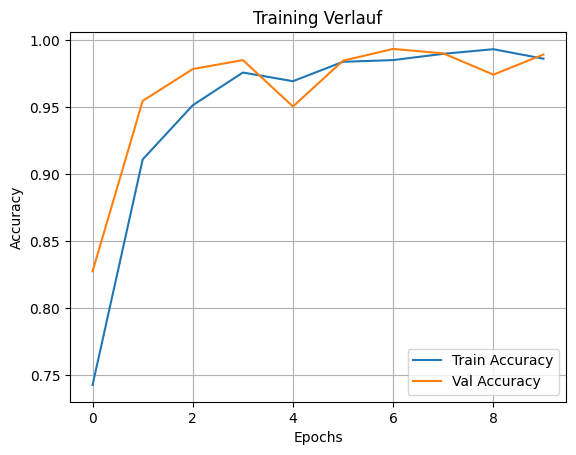

In [10]:


# 📊 Training-Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.title("Training Verlauf")
plt.show()


In [11]:
# 💾 Modell speichern
model.save("cnn_model.keras")
print("✅ Modell gespeichert als cnn_model.keras")

✅ Modell gespeichert als cnn_model.keras


In [14]:

# 🔍 Vorhersagen auf val_ds (flatten)
import numpy as np
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# 📄 Bericht
from sklearn.metrics import classification_report, confusion_matrix
print("\n📄 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

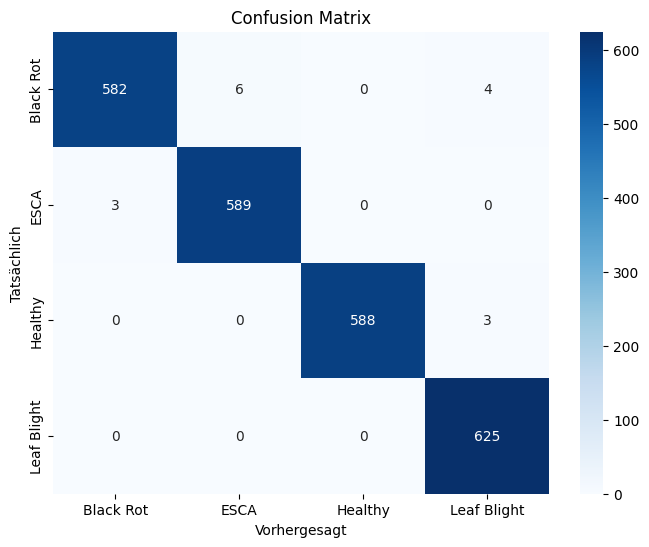

In [16]:
# 🔀 Matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Vorhergesagt")
plt.ylabel("Tatsächlich")
plt.title("Confusion Matrix")
plt.show()


| Tatsächlich →<br>Vorhergesagt ↓ | **Black Rot** | **ESCA** | **Healthy** | **Leaf Blight** |
| ------------------------------- | ------------- | -------- | ----------- | --------------- |
| **Black Rot**                   | 582 ✅         | 6 ❌      | 0           | 4 ❌             |
| **ESCA**                        | 3 ❌           | 589 ✅    | 0           | 0               |
| **Healthy**                     | 0             | 0        | 588 ✅       | 3 ❌             |
| **Leaf Blight**                 | 0             | 0        | 0           | 625 ✅           |
